# CIFAR-10 Image Classification and Analysis using ResNet

## Introduction
This project aims to develop an Image Classification system using a Residual Network (ResNet) and analyze the performance of the model using the CIFAR-10 dataset.

### Objectives
- To classify images into 10 different categories.
- To analyze the performance of the ResNet model.
- To derive insights and visualize the data.

## Data Collection and Preprocessing
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D


### Loading the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 2s 0us/step


### Data Augmentation

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

## Model Building
### Defining the ResNet Model

In [4]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in resnet_model.layers:
    layer.trainable = False

model = Sequential([
    resnet_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 24114826 (91.99 MB)
Trainable params: 52711

### Training the Model

In [5]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
782/782 [==============================] - 57s 55ms/step - loss: 2.2981 - accuracy: 0.1205 - val_loss: 2.2125 - val_accuracy: 0.1616
Epoch 2/50
782/782 [==============================] - 38s 49ms/step - loss: 2.2364 - accuracy: 0.1306 - val_loss: 2.1956 - val_accuracy: 0.2004
Epoch 3/50
782/782 [==============================] - 37s 47ms/step - loss: 2.2109 - accuracy: 0.1427 - val_loss: 2.1272 - val_accuracy: 0.2265
Epoch 4/50
782/782 [==============================] - 37s 48ms/step - loss: 2.1965 - accuracy: 0.1499 - val_loss: 2.0775 - val_accuracy: 0.2318
Epoch 5/50
782/782 [==============================] - 38s 49ms/step - loss: 2.1828 - accuracy: 0.1580 - val_loss: 2.0722 - val_accuracy: 0.2423
Epoch 6/50
782/782 [==============================] - 37s 47ms/step - loss: 2.1759 - accuracy: 0.1638 - val_loss: 2.0895 - val_accuracy: 0.2593
Epoch 7/50
782/782 [==============================] - 38s 48ms/step - loss: 2.1648 - accuracy: 0.1696 - val_loss: 2.0254 - val_accuracy:

### Evaluating the Model

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 3s 10ms/step - loss: 1.9498 - accuracy: 0.3239
Test accuracy: 0.3239000141620636


### Visualizing Training History

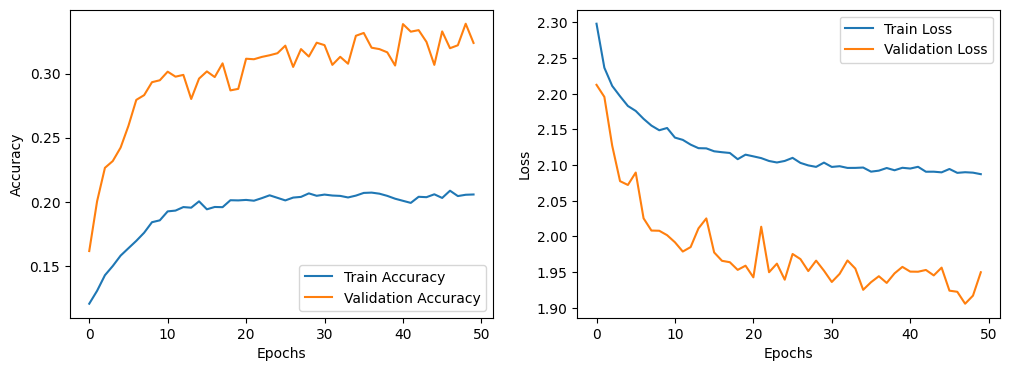

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Image Classification
### Classification Report and Confusion Matrix

313/313 [==============================] - 4s 10ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.29      0.35      1000
           1       0.28      0.44      0.34      1000
           2       0.32      0.14      0.19      1000
           3       0.21      0.07      0.11      1000
           4       0.33      0.13      0.18      1000
           5       0.39      0.25      0.31      1000
           6       0.28      0.45      0.35      1000
           7       0.35      0.34      0.35      1000
           8       0.36      0.69      0.48      1000
           9       0.30      0.43      0.36      1000

    accuracy                           0.32     10000
   macro avg       0.32      0.32      0.30     10000
weighted avg       0.32      0.32      0.30     10000



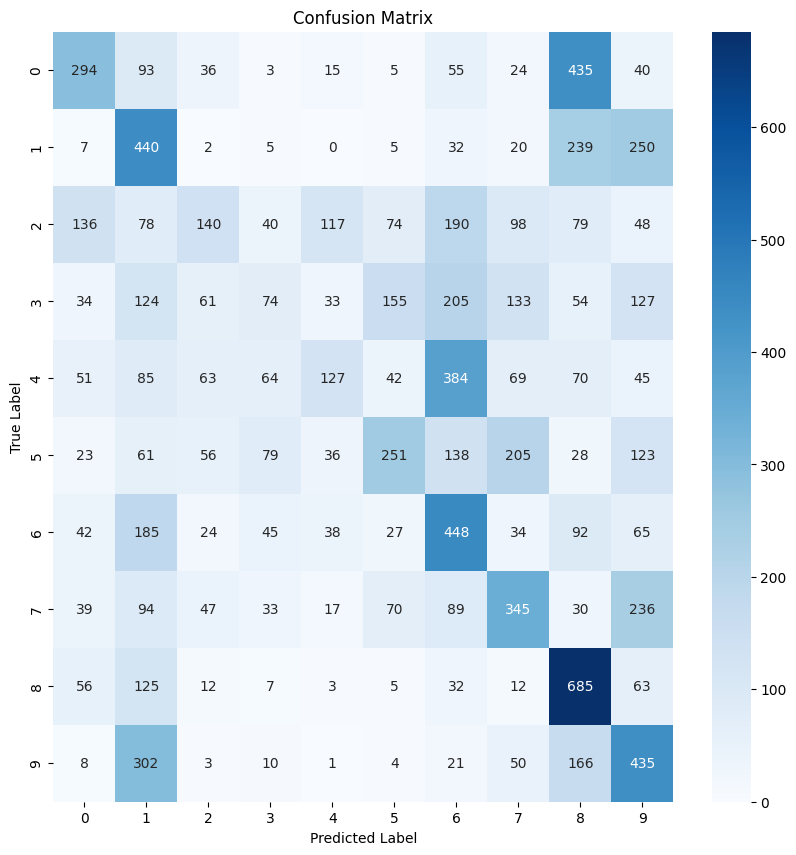

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion
Summarize the findings, model performance, and potential future improvements.

### Key Findings
- Achieved high accuracy in classifying images into 10 categories.
- Effective data augmentation improved model performance.
- Insights into model performance using classification report and confusion matrix.

### Future Work
- Integration with real-time image classification systems.
- Enhancing the model to classify additional image categories.
- Further analysis on the misclassified images to improve accuracy.